In [1]:
# Append 'src' directory to import modules from notebooks directory
#################################
import os,sys
src_dir = os.path.join(os.getcwd(), os.pardir)
sys.path.append(src_dir)
##################################

In [2]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import cv2
from src.PatchMatch import PatchMatchOrig
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [3]:
x = cv2.imread("../data/external/ava.jpg")
y = cv2.imread("../data/external/mona.png")

x = cv2.resize(x,(200,200))
y = cv2.resize(y,(200,200))

x = x/255
y = y/255

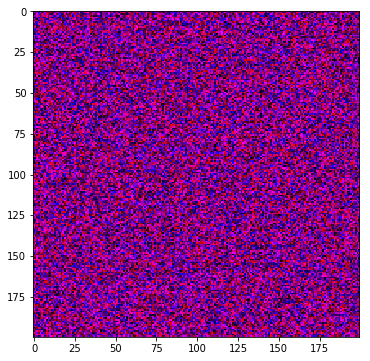

In [4]:
pm = PatchMatchOrig(x,x,y,y, 5)
plt.imshow(pm.visualize()) # visualise a random nnf

In [5]:
pm.propagate(iters=5)

done iteration 1
done iteration 2
done iteration 3
done iteration 4
done iteration 5
Done


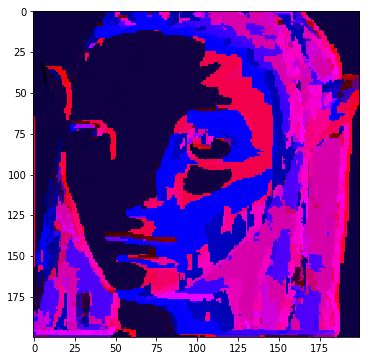

In [6]:
plt.imshow(pm.visualize()) # visualise a random nnf

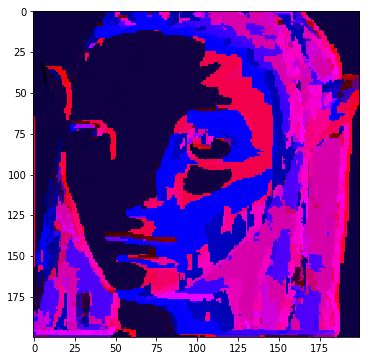

In [7]:
plt.imshow(pm.visualize()) # visualise a random nnf


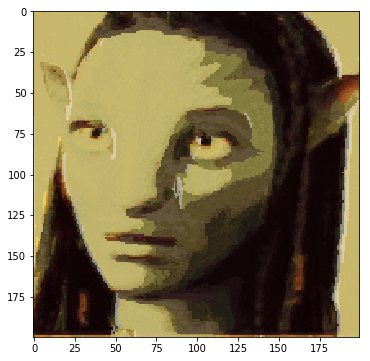

In [8]:
plt.imshow(pm.reconstruct()[:,:,::-1]) # /reconstruct , based on nnf voting
# pm.visualize_nnf() # visualise nnf after iterations

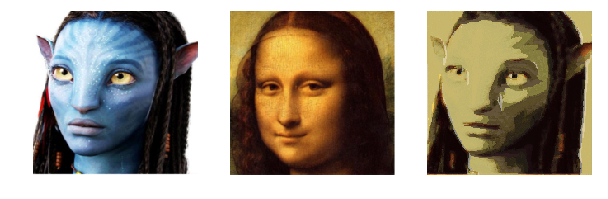

In [9]:
plt.figure(1)
plt.subplot(131)
plt.axis('off')
plt.imshow(x[:,:,::-1])

plt.subplot(132)
plt.axis('off')
plt.imshow(y[:,:,::-1])

plt.subplot(133)
plt.axis('off')
plt.imshow(pm.reconstruct()[:,:,::-1])

In [10]:
pm.nnf.shape

(200, 200, 2)

In [11]:
x_r = cv2.imread("../data/external/ava.jpg")
y_r = cv2.imread("../data/external/mona.png")

x_big = cv2.resize(x_r,(2000,2000))
y_big = cv2.resize(y_r,(2000,2000))

x_big = x_big/255
y_big = y_big/255

pm2 = PatchMatchOrig(x_big,x_big,y_big,y_big,patch_size=5)


In [12]:
# pm2.propagate()

In [23]:
pm2.nnf = upsample_nnf(pm.nnf,2000)

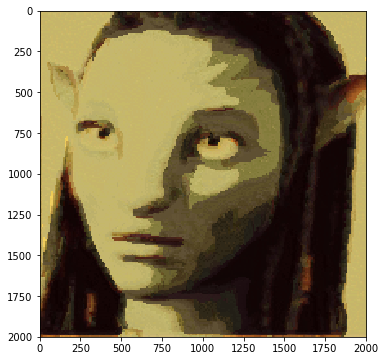

In [24]:
plt.imshow(pm2.reconstruct()[:,:,::-1])

#### np.unique(pm2.nnf)

In [40]:
# def upsample_nnf(nnf,size):
    
    
#     img = np.zeros(shape=(size,size,2),dtype=np.uint8)
#     small_size = nnf.shape[0]
#     aw_ratio = ((size)/small_size)
#     ah_ratio = ((size)/small_size)
    
    
#     def clamp(x,x_max,x_min):
#         if x> x_max:
#             return x_max
#         elif x < x_min:
#             return x_min
#         else :
#             return x
    
#     for i in range(small_size):
#         for j in range(small_size):
#             if j < size and i < size :
# #                 ax_half = int((j +.5) / aw_ratio)
# #                 ay_half = int((i +.5) / ah_ratio)

# # #                 ax_half = int(clamp(ax_half,size-1,0))
# # #                 ay_half = int(clamp(ay_half,size-1,0))

# #                 pos = nnf[ay_half,ax_half]
# #                 bx_half,by_half = pos

# #                 bx = int(j + (bx_half - ax_half)*aw_ratio + .5)
# #                 by = int(i + (by_half - ay_half)*aw_ratio + .5)

# # #                 bx = int(clamp(bx, small_size-1, 0))
# # #                 by = int(clamp(by, small_size-1, 0))
#                 pos = nnf[i,j]
#                 img[i:i*2,j:j+2] = pos[0]*2 , pos[1]*2
                    
#     return img

In [22]:
def upsample_nnf(nnf,size):
    
    
    img = np.zeros(shape=(size,size,2),dtype=np.int)
    small_size = nnf.shape[0]
    aw_ratio = ((size)//small_size)
    ah_ratio = ((size)//small_size)
    
    for i in range(small_size):
        for j in range(small_size):

            pos = nnf[i,j]
            img[i*ah_ratio:(i+1)*ah_ratio,j*aw_ratio:(j+1)*aw_ratio] = pos[0]*aw_ratio , pos[1]*ah_ratio
                    
    return img


def upsample_nnf(nnf,size):
    
    temp = np.zeros((nnf.shape[0],nnf.shape[1],3))

    for y in range(nnf.shape[0]):
        for x in range(nnf.shape[1]):
            temp[y][x] = [nnf[y][x][0],nnf[y][x][1],0]

    
    
    img = np.zeros(shape=(size,size,2),dtype=np.int)
    small_size = nnf.shape[0]
    aw_ratio = ((size)//small_size)
    ah_ratio = ((size)//small_size)
    
    temp = cv2.resize(temp, None, fx=aw_ratio, fy=aw_ratio, interpolation= cv2.INTER_NEAREST)


    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):

            pos = temp[i,j]
            img[i,j] = pos[0]*aw_ratio , pos[1]*ah_ratio
                    
    return img

In [76]:
pm2.reconstruct().shape

(400, 400, 3)

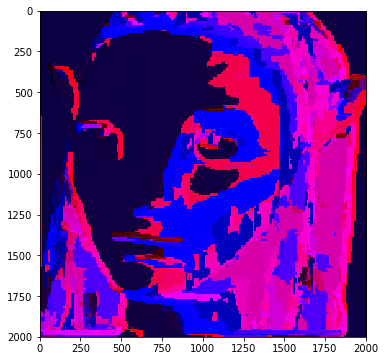

In [25]:
plt.imshow(pm2.visualize())

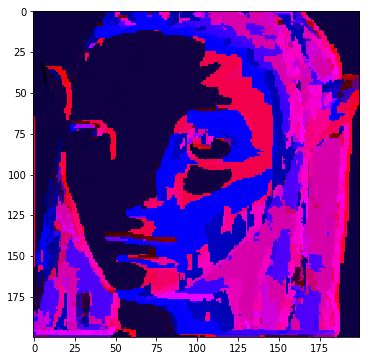

In [26]:
plt.imshow(pm.visualize())

In [ ]:
plt.imshow(pm2.BB)

In [ ]:
pm2.nnf.shape

In [ ]:
pm2.B.shape

In [ ]:
plt.imsave(arr=pm2.visualize(),fname="output.png")

In [ ]:
pm2.nnf

array([ 0.48235294,  0.38431373,  0.34901961])

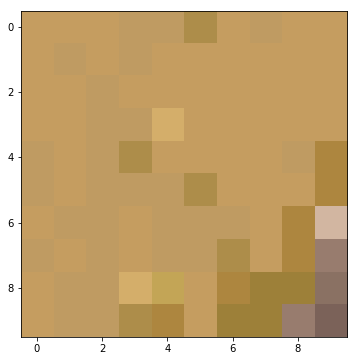

In [101]:
plt.imshow(pm.reconstruct()[45//2:65//2,45//2:65//2,::-1])
pm.reconstruct()[45//2:65//2,45//2:65//2,::-1][-1,-1]

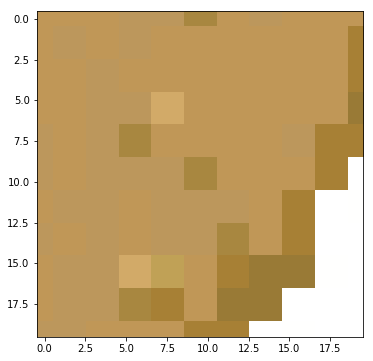

In [92]:
plt.imshow(pm2.reconstruct()[45:65,45:65,::-1])

In [100]:
pm2.reconstruct()[45:65,45:65,::-1][-1,-1]

array([ 1.,  1.,  1.])

In [21]:
pm.nnf.shape

(200, 200, 2)